In [ ]:
# importing required libraries
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import cv2
from PIL import Image

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,image_name;class;x;y;width;height


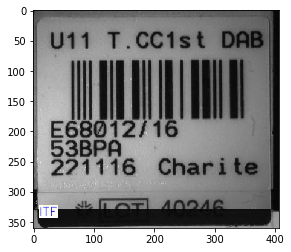

In [4]:
image = plt.imread('train_images/Cell_0001.jpg')
plt.imshow(image)

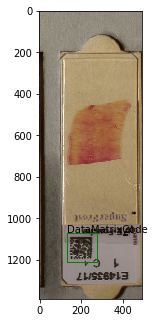

In [5]:
fig = plt.gcf()
ax = fig.add_axes([0,0,1,1])
image = plt.imread('train_images/Cell3878.jpg')
#size = fig.get_size_inches() * fig.dpi
#size = [407., 360.]
size = image.shape

plt.imshow(image)

files_list = glob.glob("train_images/Cell3878.txt") #INFO: Read first argument which contains the directory of images.

for file_name in files_list:
    file = open(file_name, "r")
    file_stream = file.readlines()
    # INFO: No need to check if the lines are empty because they got already filtered by readlines().

    #print(file_name)
    for line_number, line in enumerate(file_stream):
        line_elements = line.split(" ", 5)

        if len(line_elements) != 5:
            print("INFO: " + "Line " + str(line_number) + " in " + file_name + " is maybe no YOLO annotation.")
            continue
        
        for i, line_element in enumerate(line_elements):
            if i == 0:
                label = int(line_element)
            if i == 1:
                x = float(line_element) * size[1]
            if i == 2:
                y = float(line_element) * size[0]
            if i == 3:
                width = float(line_element) * size[1]
            if i == 4:
                height = float(line_element) * size[0]
        
        if int(label) == 0:
            edgecolor = 'r'
            ax.annotate('1d-barcode', xy=(x-(width/2),y-(height/2)-3))
        elif int(label) == 1:
            edgecolor = 'g'
            ax.annotate('DataMatrixCode', xy=(x-(width/2),y-(height/2)-3))
        
        # add bounding boxes to the image
        rect = patches.Rectangle((x-(width/2),y-(height/2)), width, height, edgecolor = edgecolor, facecolor = 'none')

        ax.add_patch(rect)

## Create annotation file
Reading data an convert annotations into annotate.txt file:


In [11]:
data = []

files_list = glob.glob("train_images/*.txt") #INFO: Read first argument which contains the directory of images.

for file_name in files_list:
    file = open(file_name, "r")
    file_stream = file.readlines()
    # INFO: No need to check if the lines are empty because they got already filtered by readlines().
    
    image_name = os.path.splitext(str(file_name))[0]+".jpg"
    #image_file = cv2.imread(image_name)
    #image_dimensions = image_file.shape
    
    try:
        image_file = Image.open(image_name)
        image_width, image_height = image_file.size
    except IOError:
        print("INFO: " + image_name + " is not a file.")

    for line_number, line in enumerate(file_stream):
        line_elements = line.split(" ", 5)

        if len(line_elements) != 5:
            print("INFO: " + "Line " + str(line_number) + " in " + file_name + " is maybe no YOLO annotation.")
            continue
        
        for i, line_element in enumerate(line_elements):
            if i == 0:
                if int(line_element) == 0:
                    label = '1d-barcode'
                elif int(line_element) == 1:
                    label = 'DataMatrixCode'
            if i == 1:
                x = float(line_element) * image_width
            if i == 2:
                y = float(line_element) * image_height
            if i == 3:
                width = float(line_element) * image_width
            if i == 4:
                height = float(line_element) * image_height
            
        filename_elements = file_name.split("\\", 2)
        filename_relative = os.path.splitext(str(filename_elements[1]))[0]+".jpg"

        data.append([os.path.splitext(str(file_name))[0]+".jpg", int(x - width/2), int(y - height/2), int(x + width/2), int(y + height/2), label])

df = pd.DataFrame(data, columns = ["image_names", "xmin", "ymin", "xmax", "ymax", "class_name"])
df.to_csv('annotate.txt', header=None, index=None, sep=',')


INFO: train_images\classes.jpg is not a file.
INFO: Line 0 in train_images\classes.txt is maybe no YOLO annotation.
INFO: Line 1 in train_images\classes.txt is maybe no YOLO annotation.
